In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest
import pandas as pd # preprocessing and to work with excel or csv file
import numpy as np #
import matplotlib.pyplot as plt # visualization
import seaborn as sns

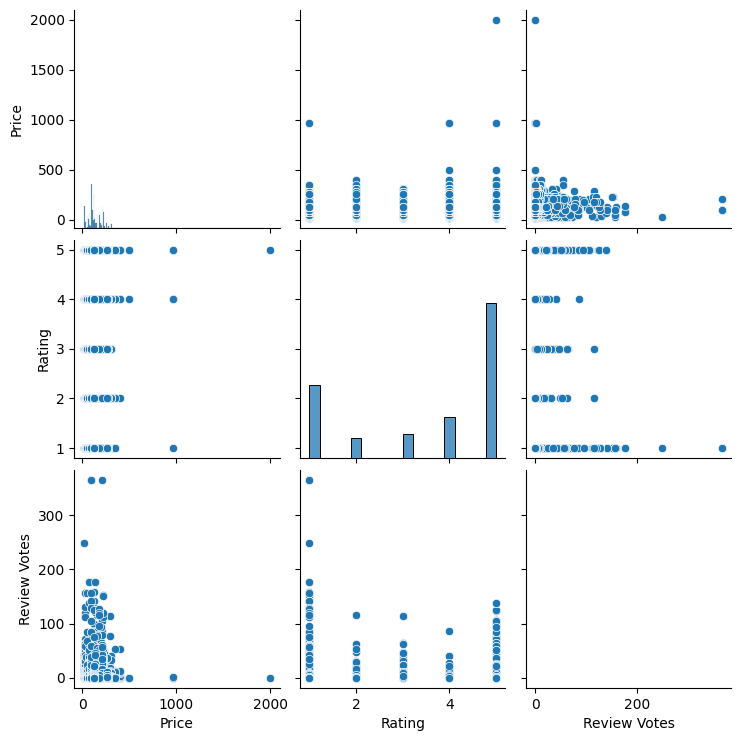

In [2]:
# Importing Dataset & Data Distribution and Correlation
dataset = pd.read_csv('final.csv')
g = sns.pairplot(dataset)
plt.show()

In [3]:
# Removing Missing Values
start = 0
end = 10000
dataset.iloc[start:end,0:1] = dataset.iloc[:,0:1].fillna("missing")
dataset.iloc[start:end,1:2] = dataset.iloc[:,1:2].fillna("missing")
dataset.iloc[start:end,3:4] = dataset.iloc[:,3:4].fillna("missing")
dataset.iloc[start:end,4:5] = dataset.iloc[:,4:5].fillna("missing")
dataset.iloc[start:end,5:6] = dataset.iloc[:,5:6].fillna("missing")
dataset.head(5)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


In [4]:
# Selecting training and target value
le = LabelEncoder() # label encoding
start_node = 2
end_node = 10000
dataset.iloc[start_node:end_node,0:1]=le.fit_transform(dataset.iloc[start_node:end_node,0:1])
dataset.iloc[start_node:end_node,1:2]=le.fit_transform(dataset.iloc[start_node:end_node,1:2])
dataset.iloc[start_node:end_node,2:3]=le.fit_transform(dataset.iloc[start_node:end_node,2:3])
dataset.iloc[start_node:end_node,4:5]=le.fit_transform(dataset.iloc[start_node:end_node,4:5])
dataset.iloc[start_node:end_node,6:7]=le.fit_transform(dataset.iloc[start_node:end_node,6:7])
dataset.iloc[start_node:end_node,7:8]=le.fit_transform(dataset.iloc[start_node:end_node,7:8])
print(dataset.shape)
print(dataset.head(5))


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

ValueError: ignored

In [ ]:
y = dataset.iloc[start_node:end_node,7:8]
print(y.values)
dataset = dataset.drop('Review Votes',axis = 1)
x = dataset.iloc[start_node:end_node,0:6]

In [ ]:
minmax = MinMaxScaler()
x = minmax.fit_transform(x)
y = minmax.fit_transform(y)

In [ ]:
# Building Neural Network Model
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
#SGD optimizer
model = Sequential()
model.add(Dense(6, input_dim=6, kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(3, kernel_initializer='normal',activation = 'sigmoid'))
model.add(Dense(1, kernel_initializer='normal',activation = 'sigmoid'))
model.compile(loss='mae', optimizer='sgd')
history_2 = model.fit(x_train,y_train, epochs=500,batch_size=32,verbose = 1)
plt.plot(history_2.history['loss'])
plt.title('Ploting Loss Function')
plt.ylabel('Loss for SGD')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)


In [ ]:
#Adam Optmizer
model = Sequential()
model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(5, kernel_initializer='normal',activation = 'sigmoid'))
model.add(Dense(1, kernel_initializer='normal',activation = 'sigmoid'))
model.compile(loss='mse', optimizer='adam')
history_2 = model.fit(x_train,y_train, epochs=500,batch_size=32,verbose = 1)
plt.plot(history_2.history['loss'])
plt.title('Ploting Loss Function')
plt.ylabel('Loss for Adam')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [ ]:
# Dataset Information
dataset.info()
#Importing libraries for various performance measurement
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
y_pred = model.predict(x_test)


In [ ]:
print("Maximum Error : ", max_error(y_test, y_pred))
print("Mean Abolsute Error : ", mean_absolute_error(y_test, y_pred))
print("Explained Variance Score : " ,explained_variance_score(y_test,y_pred))
print("Mean Squared Log Error : ", mean_squared_log_error(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("R2 Score : ", r2_score(y_test,y_pred))
print("Mean Poisson Deviance : ", mean_poisson_deviance(y_test,y_pred))
print("Median Absolute Error : ", median_absolute_error(y_test,y_pred))
print("Maximum Error : ", max_error(y_test, y_pred))

In [ ]:
# Ploting the actual values and predicted values
ax = plt.subplots()
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.1)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted',alpha = 0.1)
plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [ ]:
# Evaluation of Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state = 0, max_depth =0.9)
regressor.fit(x_train, y_train)
y_pred_dt = regressor.predict(x_test)
print("Mean Abolsute Error : ", mean_absolute_error(y_test, y_pred_dt))
print("Explained Variance Score : " ,explained_variance_score(y_test,y_pred_dt))
print("Mean Squared Log Error : ", mean_squared_log_error(y_test,y_pred_dt))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred_dt))
print("R2 Score : ", r2_score(y_test,y_pred_dt))
print("Median Absolute Error : ", median_absolute_error(y_test,y_pred_dt))
print("Maximum Error : ", max_error(y_test, y_pred_dt))



In [ ]:
Evaulutation of Random forest regressor
reg = RandomForestRegressor(random_state = 0,n_estimators =2, max_depth = 0.9)
reg.fit(x_train, y_train)
y_pred_rf = reg.predict(x_test)
print("Mean Absolute Error for Random Forest Regressor : ",mean_absolute_error(y_test, y_pred_rf))
print("Explained Variance Score for Random Forest Regressor: "explained_variance_score(y_test,y_pred_rf))
print("Mean Squared Error for Random Forest Regressor : ",mean_squared_log_error(y_test,y_pred_rf))
print("Mean Squared Error for Random Forest Regressor : ",mean_squared_error(y_test,y_pred_rf))
print("Maximum Error for Random Forest Regressor : ", max_error(y_test,y_pred_rf))
print("R2 Score : ", r2_score(y_test,y_pred_rf))
print("Median Absolute Error : ", median_absolute_error(y_test,y_pred_rf))
print("Maximum Error : ", max_error(y_test, y_pred_rf))


In [ ]:
# Comparasion of differnt algorithms for whole data
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
reg4 = DecisionTreeRegressor()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(x_train, y_train)
reg3.fit(x_train, y_train)
reg4.fit(x_train, y_train)
ereg.fit(x_train, y_train)
plt.figure()
plt.plot(reg1.predict(x_test), 'gd', label='GradientBoostingRegressor')
plt.plot(reg3.predict(x_test), 'ys', label='LinearRegression')
plt.plot(reg3.predict(x_test), 'b', label='Decision Tree Regressor')
plt.plot(ereg.predict(x_test), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
labelbottom=False)
plt.ylabel('Revenue')
plt.xlabel('Training samples')
plt.legend(loc="Best")
plt.title('Comparison of revenue predicition model')
plt.show()


In [ ]:
# Comparsion of three different algorithms for random data
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = ('Real','Decision Tree', 'Random Forest', 'ANN')
y_pos = np.arange(len(objects))
performance = [y_test[35],y_pred_dt[35],y_pred_rf[35], y_pred[35]]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Revenue')
plt.title('Comparasion of Two different algorithms')
plt.show()



In [ ]:
# Comparasion of differnt algorithms for whole data with ANN

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
reg4 = DecisionTreeRegressor()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(x_train, y_train)
reg3.fit(x_train, y_train)
reg4.fit(x_train, y_train)
ereg.fit(x_train, y_train)
a = reg1.predict(x_test)
b = reg3.predict(x_test)
c = reg4.predict(x_test)
d = ereg.predict(x_test)
e = model.predict(x_test)
a = a.reshape(-1,1)
b = b.reshape(-1,1)
c = c.reshape(-1,1)
d = d.reshape(-1,1)
e = e.reshape(-1,1)
a = minmax.inverse_transform(a)
b = minmax.inverse_transform(b)
c = minmax.inverse_transform(c)
d = minmax.inverse_transform(d)
e = minmax.inverse_transform(e)
plt.figure()


In [ ]:
plt.plot(a, 'gd', label='GradientBoostingRegressor')
plt.plot(b, 'ys', label='LinearRegression')
plt.plot(c, 'b', label='Decision Tree Regressor')
plt.plot(d, 'r*', label='VotingRegressor')
plt.plot(e, 'y*', label='ANN')
#plt.tick_params(axis='x', which='both', bottom=False, top=False,
# labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Training samples')
plt.legend(loc="Best")
plt.title('Comparison of revenue predicition model')
plt.show()